In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
mnist = keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


X shape: (60000, 28, 28)  - type: uint8
y shape: (60000,)  - type: uint8


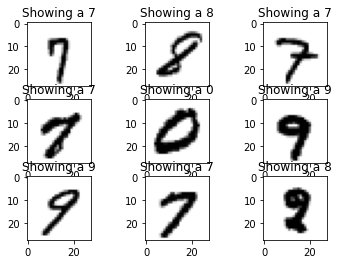

In [3]:
import numpy as np
import matplotlib.pyplot as plt

print('X shape: ' + repr(X_train_full.shape) , ' - type: ' + str(X_train_full.dtype))
print('y shape: ' + repr(y_train_full.shape) , ' - type: ' + str(X_train_full.dtype))

tmpidxs = np.random.permutation( X_train_full.shape[0] )[:9]

plt.clf()
for i in range(9):
    plt.subplot(3,3,i+1)
    tmp_idx = tmpidxs[i]
    plt.imshow(X_train_full[tmp_idx,:,:], cmap='gray_r')
    plt.title('Showing a ' + str( y_train_full[tmp_idx] ) )
plt.show()

In [4]:
# also readjust range to float 0-1 for gradient descend training

X_valid, X_train = X_train_full[:5000]/255., X_train_full[5000:]/255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test/255.

In [5]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(10, activation='tanh')) # no need to have 10 units here - just for viewing 10 weight "images"
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

# why are the parameters 7960?
# why in the previous model, the parameters were the parameters 7850?

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


dense
dense_1
(784, 10)
(10,)
(10, 10)
(10,)


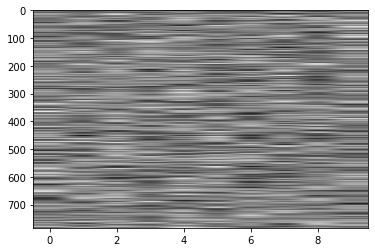

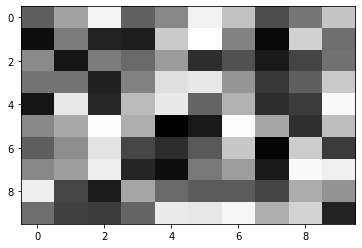

In [6]:
hidden1 = model.layers[1]
print(hidden1.name)
hidden2 = model.layers[2]
print(hidden2.name)

# access weights and biases
weights1, biases1 = hidden1.get_weights()
print(repr(weights1.shape))
print(repr(biases1.shape))
weights2, biases2 = hidden2.get_weights()
print(repr(weights2.shape))
print(repr(biases2.shape))

plt.clf()
plt.imshow(weights1, cmap='gray_r', aspect='auto')
plt.show()
plt.clf()
plt.imshow(weights2, cmap='gray_r', aspect='auto')
plt.show()

In [7]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [8]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 5s 3ms/step - loss: 1.0712 - accuracy: 0.7565 - val_loss: 0.6352 - val_accuracy: 0.8662
Epoch 2/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5481 - accuracy: 0.8716 - val_loss: 0.4570 - val_accuracy: 0.8876
Epoch 3/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4422 - accuracy: 0.8871 - val_loss: 0.3915 - val_accuracy: 0.8984
Epoch 4/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3939 - accuracy: 0.8963 - val_loss: 0.3560 - val_accuracy: 0.9066
Epoch 5/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3643 - accuracy: 0.9028 - val_loss: 0.3347 - val_accuracy: 0.9120
Epoch 6/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3437 - accuracy: 0.9069 - val_loss: 0.3173 - val_accuracy: 0.9142
Epoch 7/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3280 - accuracy: 0.9108 - val_loss: 0.3070 - val_accuracy:

In [9]:
model.evaluate( X_test, y_test )

313/313 [==============================] - 1s 2ms/step - loss: 0.2951 - accuracy: 0.9163


[0.2951303720474243, 0.9162999987602234]

dense
dense_1
(784, 10)
(10,)
(10, 10)
(10,)


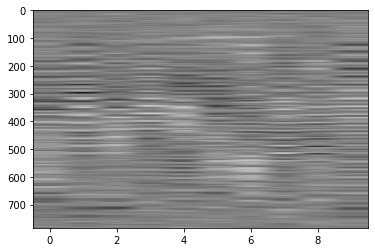

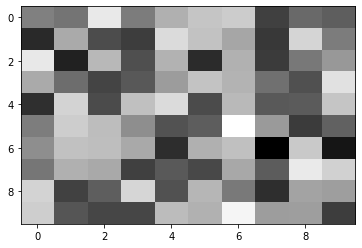

In [10]:
hidden1 = model.layers[1]
print(hidden1.name)
hidden2 = model.layers[2]
print(hidden2.name)

# access weights and biases
weights1, biases1 = hidden1.get_weights()
print(repr(weights1.shape))
print(repr(biases1.shape))
weights2, biases2 = hidden2.get_weights()
print(repr(weights2.shape))
print(repr(biases2.shape))

plt.clf()
plt.imshow(weights1, cmap='gray_r', aspect='auto')
plt.show()
plt.clf()
plt.imshow(weights2, cmap='gray_r', aspect='auto')
plt.show()

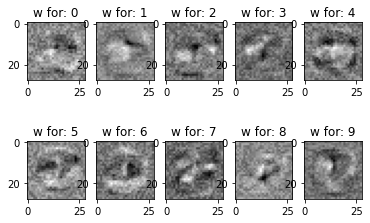

In [11]:
# let's see the weights for each neuron
plt.clf()
for i in range(weights1.shape[1]):
    plt.subplot(2,5,i+1)
    plt.imshow( np.reshape(weights1[:,i], (28,28)) , cmap='gray_r' )
    plt.title( 'w for: ' + str(i) )
plt.show()

In [12]:
# let's try to change the model - play around with more layers or units per layer
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(1024, activation='tanh'))
model.add(keras.layers.Dense(512, activation='tanh'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 1024)              803840    
                                                                 
 dense_3 (Dense)             (None, 512)               524800    
                                                                 
 dense_4 (Dense)             (None, 10)                5130      
                                                                 
Total params: 1,333,770
Trainable params: 1,333,770
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [14]:
history = model.fit(X_train, y_train, epochs=10, batch_size=100,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
550/550 [==============================] - 13s 23ms/step - loss: 0.6992 - accuracy: 0.8262 - val_loss: 0.4089 - val_accuracy: 0.8916
Epoch 2/10
550/550 [==============================] - 12s 22ms/step - loss: 0.3898 - accuracy: 0.8905 - val_loss: 0.3362 - val_accuracy: 0.9074
Epoch 3/10
550/550 [==============================] - 12s 22ms/step - loss: 0.3438 - accuracy: 0.9021 - val_loss: 0.3069 - val_accuracy: 0.9144
Epoch 4/10
550/550 [==============================] - 12s 22ms/step - loss: 0.3202 - accuracy: 0.9091 - val_loss: 0.2900 - val_accuracy: 0.9168
Epoch 5/10
550/550 [==============================] - 12s 22ms/step - loss: 0.3045 - accuracy: 0.9133 - val_loss: 0.2783 - val_accuracy: 0.9220
Epoch 6/10
550/550 [==============================] - 13s 23ms/step - loss: 0.2924 - accuracy: 0.9174 - val_loss: 0.2693 - val_accuracy: 0.9248
Epoch 7/10
550/550 [==============================] - 13s 24ms/step - loss: 0.2829 - accuracy: 0.9195 - val_loss: 0.2620 - val_accuracy:

In [15]:
model.evaluate( X_test, y_test )

313/313 [==============================] - 2s 5ms/step - loss: 0.2494 - accuracy: 0.9287


[0.249433696269989, 0.9286999702453613]

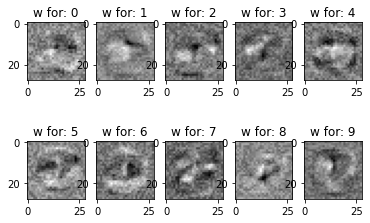

In [16]:
# let's see the weights for each neuron
# CAUTION: this will not work if shape of weights1 is not 784x1
if weights1.shape[1] == 10:
    plt.clf()
    for i in range(weights1.shape[1]):
        plt.subplot(2,5,i+1)
        plt.imshow( np.reshape(weights1[:,i], (28,28)) , cmap='gray_r' )
        plt.title( 'w for: ' + str(i) )
    plt.show()
else:
    print(weights1.shape[1])
    print('this will not work of shape of weights1 is not 784x1')